In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
data=pd.read_csv(r"C:\ml\da\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [93]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [78]:
#feature Engineering

In [94]:
males=pd.get_dummies(data['sex'],drop_first=True)
df=pd.concat([data,males],axis=1)

In [146]:
smoker=pd.get_dummies(df['smoker'],drop_first=True)
df=pd.concat([df,smoker],axis=1)


In [147]:
region=pd.get_dummies(df['region'],drop_first=True)
df=pd.concat([df,region],axis=1)


In [148]:
df.replace({False:0,True:1},inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,smoker1,yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [117]:
df=df.rename(columns={'yes':'smoker1'})


In [119]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [122]:
#exploratry analysis

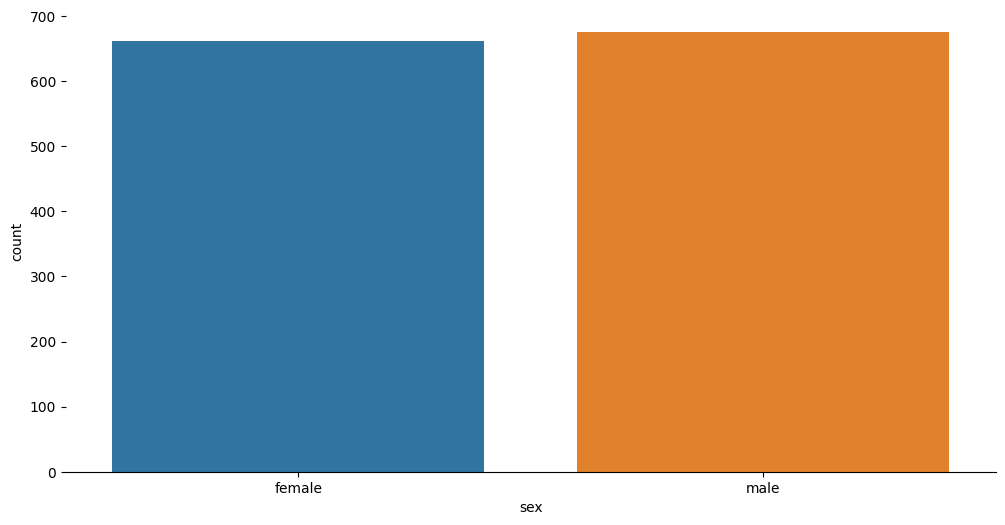

In [132]:
plt.figure(figsize=(12,6))
sns.countplot(x='sex',data=df)
sns.despine(left=True)

In [134]:
#relationship of smoking and gender w.r.t charges

<Axes: xlabel='sex', ylabel='charges'>

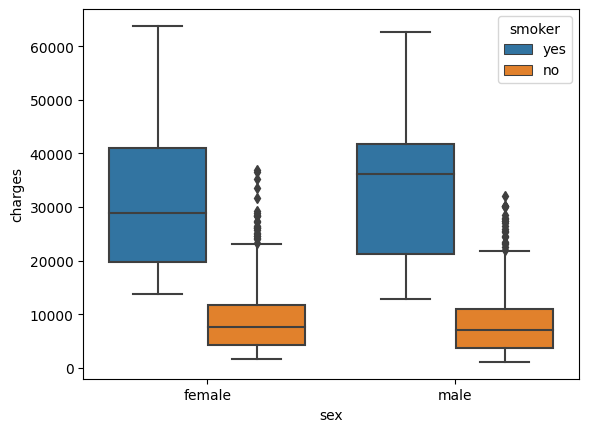

In [137]:
sns.boxplot(x='sex',data=df,y='charges',hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

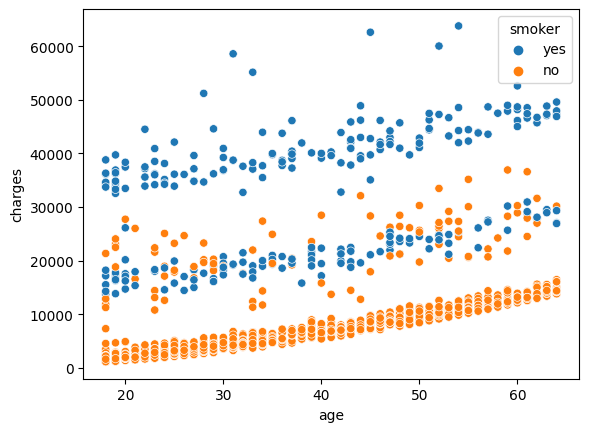

In [144]:
sns.scatterplot(x='age',y='charges',data=df,hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

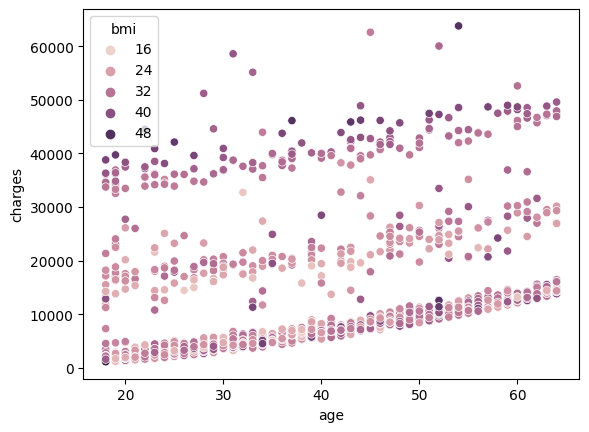

In [145]:
sns.scatterplot(x='age',y='charges',data=df,hue='bmi')

In [151]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)

KeyError: "['sex', 'smoker', 'region'] not found in axis"

In [157]:
corr=df.corr()

<Axes: >

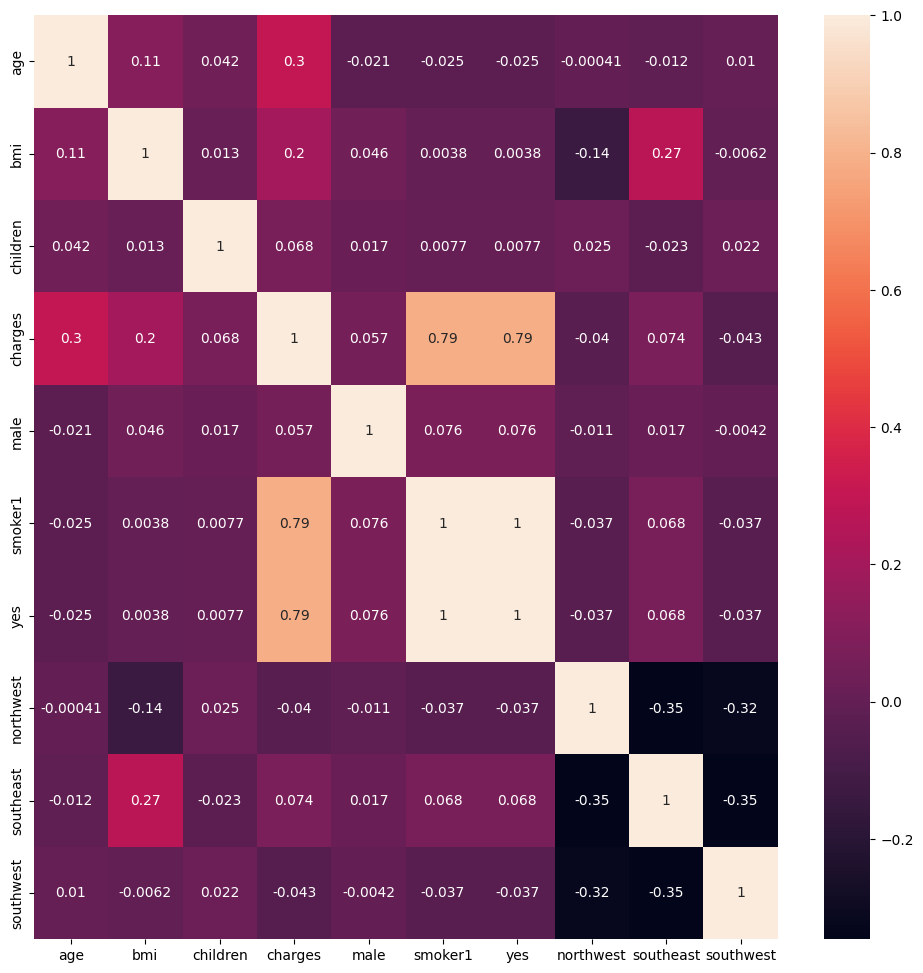

In [163]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

In [167]:
x=df.drop(['charges'],axis=1)
y=df['charges']

In [170]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [175]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [179]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.fit_transform(x_test)

In [182]:
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [184]:
predict=regressor.predict(scaled_x_test)

<Axes: ylabel='charges'>

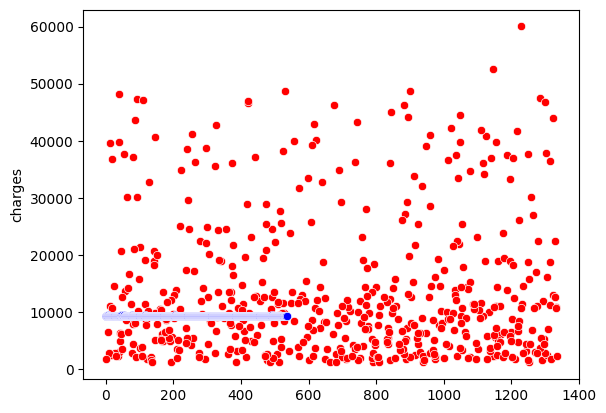

In [190]:
sns.scatterplot(data=y_test,color='red')
sns.scatterplot(data=predict,color='blue')
